**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

*All the text in italics is instructions for filling the template - remove when writing the project report!*

# *Title* 

*Title should be concise and informative, describes the approach to solve the problem. Some good titles from previous years:*

*- Comparing extreme learning machines and naive bayes’ classifier in spam detection*

*- Using linear discriminant analysis in spam detection*

*Some not-so-good titles:*

*- Bayesian spam filtering with extras*

*- Two-component classifier for spam detection*

*- CS-E3210 Term Project, final report*




## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*



## 2. Data analysis

*Briefly describe data (class distribution, dimensionality) and how will it affect
classification. Visualize the data. Don’t focus too much on the meaning of the features,
unless you want to.*

*- Include histograms showing class distribution.*



In [70]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from IPython.display import display, HTML
import matplotlib.pyplot as plt

# Load files
test_data_accuracy = pd.read_csv('./accuracy/test_data.csv')
train_data_accuracy = pd.read_csv('./accuracy/train_data.csv')
train_labels_accuracy = pd.read_csv('./accuracy/train_labels.csv')

test_data_logloss = pd.read_csv('./log-loss/test_data.csv')
train_data_logloss = pd.read_csv('./log-loss/train_data.csv')
train_labels_logloss = pd.read_csv('./log-loss/train_labels.csv')

# Parse loaded content
test_data_accuracy = test_data_accuracy.values
train_data_accuracy = train_data_accuracy.values
train_labels_accuracy = train_labels_accuracy.values

test_data_logloss = test_data_logloss.values
train_data_logloss = train_data_logloss.values
train_labels_logloss = train_labels_logloss.values

## Accuracy
This notebooks starts with the accuracy challenge

### Contents
1. Data visualization: how are the raw data provided?
2. Data manipulation
3. ...

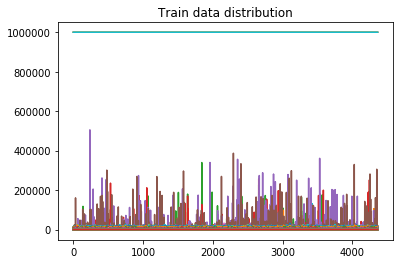

0: the mean of the row is 3098.1552831270055, the variance is 1308.8487401033724
1: the mean of the row is 4391.423186611646, the variance is 1457.2869940932196
2: the mean of the row is 3987.935778083448, the variance is 1228.0627110077442
3: the mean of the row is 4005.195022925264, the variance is 1242.1418709418856
4: the mean of the row is 3086.847523383769, the variance is 1030.9499917775672
5: the mean of the row is 3330.1404974782213, the variance is 1124.6412961110918
6: the mean of the row is 3043.8326272352137, the variance is 1097.6225659867307
7: the mean of the row is 3034.827223750573, the variance is 1120.9393155488676
8: the mean of the row is 2671.5990210912423, the variance is 1017.7424624758424
9: the mean of the row is 2440.6322329206787, the variance is 969.9647449810985
10: the mean of the row is 2516.2337551581845, the variance is 1021.154772928976
11: the mean of the row is 2566.6859832645573, the variance is 1116.7756341109337
12: the mean of the row is 3216.0

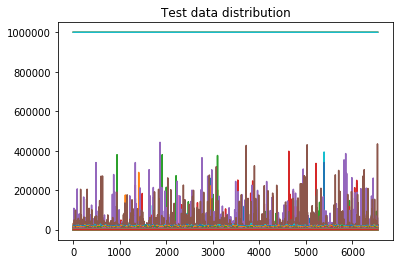

0: the mean of the row is 3058.0282329206784, the variance is 1311.2698380821932
1: the mean of the row is 4356.057599572062, the variance is 1486.8540768521966
2: the mean of the row is 3932.308180803913, the variance is 1258.3462598381288
3: the mean of the row is 3951.4838578633653, the variance is 1250.4243199206223
4: the mean of the row is 3047.6676182179426, the variance is 1034.2324859071653
5: the mean of the row is 3274.1368121656733, the variance is 1134.0638360659914
6: the mean of the row is 3001.47973131591, the variance is 1107.2571223779005
7: the mean of the row is 2985.510355341586, the variance is 1125.7365142020622
8: the mean of the row is 2611.966937184778, the variance is 1004.5911074019683
9: the mean of the row is 2404.715132508024, the variance is 962.064626684057
10: the mean of the row is 2486.1448581690356, the variance is 1015.6818306059737
11: the mean of the row is 2532.389090478374, the variance is 1106.6917862359837
12: the mean of the row is 3179.2670

In [71]:
# Visualizes the training_data
plt.plot(train_data_accuracy)
plt.title('Train data distribution')
plt.show()
mean = np.mean(train_data_accuracy, axis=0)
std = np.std(train_data_accuracy, axis=0)
for i in range(len(mean)):
    print(f'{i}: the mean of the row is {mean[i]}, the variance is {std[i]}')
# Visualizes the test_data
plt.plot(test_data_accuracy)
plt.title('Test data distribution')
plt.show()
mean = np.mean(test_data_accuracy, axis=0)
std = np.std(test_data_accuracy, axis=0)
for i in range(len(mean)):
    print(f'{i}: the mean of the row is {mean[i]}, the variance is {std[i]}')

As we can see the training data nor the test data are normalized. In addition to it, labels are not equally distribuited: indeed there are more label of class 1 (almost 50%), Pop_Rock, then any other classes. The figure below represents the occurence (in %) of each label.

Label 1 (Pop_Rock): 49.91%
Label 2 (Electronic): 14.17%
Label 3 (Rap): 7.47%
Label 4 (Jazz): 5.8%
Label 5 (Latin): 4.91%
Label 6 (RnB): 5.96%
Label 7 (International): 3.23%
Label 8 (Country): 4.47%
Label 9 (Reggae): 2.11%
Label 10 (Blues): 1.97%


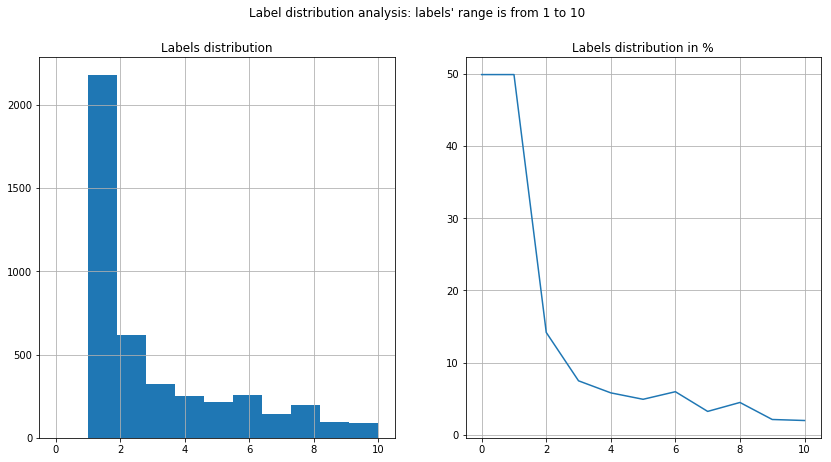

In [80]:
# Visualizes the labels
class_names = ['Pop_Rock', 'Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues']
# Since labels start by 1, in the first position of the data array, I inserted again the value of the first label, to obtain a decent plot
data = np.empty((11, 2))
for i in range(1, 11, 1):
    print(f'Label {i} ({class_names[i - 1]}): {round((len(np.where(train_labels_accuracy == i)[0]) / len(train_labels_accuracy)) * 100, 2)}%')
    data[0, 0] = 0
    data[0, 1] = round((len(np.where(train_labels_accuracy == 1)[0]) / len(train_labels_accuracy)) * 100, 2)
    data[i, 0] = i
    data[i, 1] = round((len(np.where(train_labels_accuracy == i)[0]) / len(train_labels_accuracy)) * 100, 2)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(14, 7))
ax = axs[0]
ax.hist(train_labels_accuracy)
ax.set_title('Labels distribution')
ax.grid(True)

ax = axs[1]
ax.plot(data[:, 1])
ax.set_title('Labels distribution in %')
ax.grid(True)


fig.suptitle('Label distribution analysis: labels\' range is from 1 to 10')
plt.show()

In [ ]:
# Analysis of the input data
# Feature 1: ID
# Feature 2 - 169: Rhythm pattern
# Feature 170 - 217: Chroma
# Feature 218 - 265: MFCCs
# Scales the data before feeding them into ML algorithms
scaled_train_data = preprocessing.scale(train_data_accuracy)

## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*



In [ ]:
# Trials with ML algorithms

## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



In [ ]:
#Confusion matrix ...

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *